In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def hypothesis(X, w_1,b_1,w_2,b_2): 
    h_1= relu(np.dot(X, w_1)+b_1)  
    h_2 = softmax(np.dot(h_1,w_2)+b_2)
    return h_1,h_2 
  
# function to compute gradient of error function
def gradient(X, y, w_1,b_1,w_2,b_2): 
    h_1,h_2 = hypothesis(X, w_1,b_1,w_2,b_2)
    grad_2 = np.zeros([X.shape[0],10])
    grad_1 = relu_diff(h_1)
    for i in range(X.shape[0]):
        label = np.argmax(y[i])
        grad_2[i] = -1*h_2[i]
        grad_2[i][label] = (1-h_2[i][label])
    grad_update_2 = np.dot(h_1.transpose(), grad_2) 
    grad_b2 = np.sum(grad_2,axis = 0)
    
    tmp = np.dot(w_2,grad_2.transpose())
    grad_1 = grad_1*(tmp.transpose())
    
    grad_update_1 = np.dot(X.transpose(), grad_1)
    grad_b1 = np.sum(grad_1,axis = 0)
    
    return grad_update_1,grad_update_2, grad_b1, grad_b2

  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batchsize): 
    mini_batches = [] 
    n_minibatches = X.shape[0] // batchsize 
    i = 0
  
    for i in range(n_minibatches): 
        X_mini = X[i*batchsize:(i+1)*batchsize] 
        Y_mini = y[i*batchsize:(i+1)*batchsize] 
        mini_batches.append((X_mini, Y_mini)) 
    if X.shape[0] % batchsize != 0: 
        X_mini = X[i*batchsize: X.shape[0]]
        Y_mini = y[i*batchsize: X.shape[0]]
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
def sigmoid(x):
     return 1/(1+np.exp(-x))
    
def softmax(x):
    x = x - np.max(x,axis =1).reshape(-1,1)
    exp_x = np.exp(x)
    softmax_x = exp_x / np.sum(exp_x,axis =1).reshape(-1,1)
    return softmax_x

def relu(x):
    return np.maximum(0,x)

def relu_diff(x):
    x[x>0] =1  
    x[x<=0] =0
    return x 
    
def cross_entropy(y_pred,y_label) :
    loss = 0
    datasize = y_pred.shape[0]
    for q in range(10):
        for j in range(datasize):
            if y_label[j][q] == 1:
                loss += -1*math.log(y_pred[j][q])
    loss = round(loss/datasize,2)
    return loss

def accuracy(y_pred,y_label) :
    datasize = y_pred.shape[0]
    error = 0
    for j in range(datasize):
        if np.argmax(y_pred[j]) != np.argmax(y_label[j]) :
            error += 1
    acc = round(100*(datasize-error)/datasize ,2)
    return acc

def train(x,y_label,w_1,b_1,w_2,b_2,batch_size,valid_split,epoch,lr):
    datasize = x.shape[0]
    learning_curve_train =[]
    learning_curve_valid =[]
    loss_curve_train =[]
    loss_curve_valid =[]
    trainsize = int(datasize*(1-valid_split))
    validsize = int(datasize*valid_split)
    for i in range(epoch):
        if i != 0:
            per = np.random.permutation(x.shape[0])
            x = x[per, :]
            y_label = y_label[per,:]
        print('epoch : ', i+1)
        mini_batches = create_mini_batches(x, y_label, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            grad_1,grad_2,grad_b1,grad_b2 = gradient(X_mini, y_mini, w_1,b_1,w_2,b_2)
            w_1 = w_1 + lr *grad_1
            w_2 = w_2 + lr *grad_2
            b_1 = b_1 + lr *grad_b1
            b_2 = b_2 + lr *grad_b2
            


        y_predict_train = softmax(np.dot(relu(np.dot(x[:trainsize], w_1)+b_1),w_2)+b_2)
        y_predict_valid = softmax(np.dot(relu(np.dot(x[trainsize:], w_1)+b_1),w_2)+b_2)
            
            
        acc_train = accuracy(y_predict_train,y_label[:trainsize])
        acc_valid = accuracy(y_predict_valid,y_label[trainsize:])
        learning_curve_train.append(acc_train)
        learning_curve_valid.append(acc_valid)
        print('accuracy_train : ', acc_train,'%')
        print('accuracy_validation : ', acc_valid,'%')
        loss_train = cross_entropy(y_predict_train,y_label[:trainsize])
        loss_valid = cross_entropy(y_predict_valid,y_label[trainsize:])
        loss_curve_train.append(loss_train)
        loss_curve_valid.append(loss_valid)
        print("loss_train",loss_train)
        print("loss_validation",loss_valid)
        if acc_valid > 98 :                     #stop criterion
            epoch = i+1
            print(i)
            break
        
    e = list(range(1,epoch+1))
    plt.subplot(121)
    plt.plot(e,learning_curve_train,label='train',color ='b')
    plt.plot(e,learning_curve_valid,label ='validation',color ='r')
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('accuracy', fontsize = 12)
    plt.legend(loc="lower right")
    plt.subplot(122)
    plt.plot(e,loss_curve_train,label ='train',color ='b')
    plt.plot(e,loss_curve_valid,label='validation',color = 'r')
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('loss', fontsize = 12)
    plt.legend(loc="upper right")
    plt.subplots_adjust(wspace =1, hspace =0)
    plt.show()
    
    
    
    return w_1,b_1,w_2,b_2



In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_x = mnist.train.images
train_y = mnist.train.labels
test_x = mnist.test.images
test_y = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


epoch :  1
accuracy_train :  82.25 %
accuracy_validation :  83.82 %
loss_train 0.69
loss_validation 0.61
epoch :  2
accuracy_train :  86.08 %
accuracy_validation :  86.32 %
loss_train 0.51
loss_validation 0.49
epoch :  3
accuracy_train :  84.62 %
accuracy_validation :  85.42 %
loss_train 0.58
loss_validation 0.54
epoch :  4
accuracy_train :  91.36 %
accuracy_validation :  91.58 %
loss_train 0.35
loss_validation 0.31
epoch :  5
accuracy_train :  91.23 %
accuracy_validation :  91.91 %
loss_train 0.33
loss_validation 0.29
epoch :  6
accuracy_train :  90.67 %
accuracy_validation :  91.46 %
loss_train 0.36
loss_validation 0.32
epoch :  7
accuracy_train :  90.85 %
accuracy_validation :  91.54 %
loss_train 0.32
loss_validation 0.32
epoch :  8
accuracy_train :  90.99 %
accuracy_validation :  91.59 %
loss_train 0.35
loss_validation 0.32
epoch :  9
accuracy_train :  92.21 %
accuracy_validation :  92.84 %
loss_train 0.28
loss_validation 0.25
epoch :  10
accuracy_train :  92.12 %
accuracy_validati

loss_train 0.13
loss_validation 0.11
epoch :  79
accuracy_train :  96.56 %
accuracy_validation :  97.05 %
loss_train 0.12
loss_validation 0.1
epoch :  80
accuracy_train :  96.34 %
accuracy_validation :  96.72 %
loss_train 0.13
loss_validation 0.11
epoch :  81
accuracy_train :  96.07 %
accuracy_validation :  96.37 %
loss_train 0.13
loss_validation 0.13
epoch :  82
accuracy_train :  96.43 %
accuracy_validation :  97.23 %
loss_train 0.12
loss_validation 0.1
epoch :  83
accuracy_train :  96.4 %
accuracy_validation :  97.04 %
loss_train 0.12
loss_validation 0.1
epoch :  84
accuracy_train :  94.44 %
accuracy_validation :  95.0 %
loss_train 0.2
loss_validation 0.18
epoch :  85
accuracy_train :  96.27 %
accuracy_validation :  96.6 %
loss_train 0.13
loss_validation 0.11
epoch :  86
accuracy_train :  96.59 %
accuracy_validation :  96.89 %
loss_train 0.12
loss_validation 0.1
epoch :  87
accuracy_train :  95.95 %
accuracy_validation :  96.75 %
loss_train 0.14
loss_validation 0.11
epoch :  88
accur

accuracy_train :  96.97 %
accuracy_validation :  97.16 %
loss_train 0.11
loss_validation 0.09
epoch :  157
accuracy_train :  97.11 %
accuracy_validation :  97.47 %
loss_train 0.1
loss_validation 0.09
epoch :  158
accuracy_train :  96.57 %
accuracy_validation :  97.09 %
loss_train 0.14
loss_validation 0.11
epoch :  159
accuracy_train :  96.68 %
accuracy_validation :  97.13 %
loss_train 0.12
loss_validation 0.11
epoch :  160
accuracy_train :  96.45 %
accuracy_validation :  97.01 %
loss_train 0.13
loss_validation 0.1
epoch :  161
accuracy_train :  96.99 %
accuracy_validation :  97.0 %
loss_train 0.11
loss_validation 0.09
epoch :  162
accuracy_train :  96.5 %
accuracy_validation :  97.55 %
loss_train 0.12
loss_validation 0.09
epoch :  163
accuracy_train :  95.23 %
accuracy_validation :  95.77 %
loss_train 0.18
loss_validation 0.15
epoch :  164
accuracy_train :  96.95 %
accuracy_validation :  97.28 %
loss_train 0.11
loss_validation 0.09
epoch :  165
accuracy_train :  94.73 %
accuracy_valida

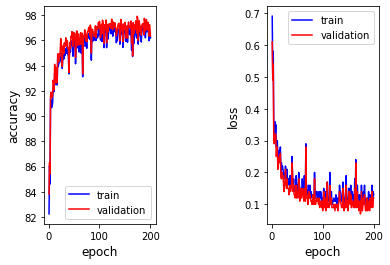

In [3]:
#np.seterr(divide='ignore', invalid='ignore')
#W_1 = np.ones([784,16])
W_1 = np.random.rand(784,16)
b_1 = np.random.rand(1,16)
#W_2 = np.ones([16,10])
W_2 = np.random.rand(16,10)
b_2 = np.random.rand(1,10)



w1_train,b1_train,w2_train,b2_train= train(train_x,train_y,W_1,b_1,W_2,b_2,100,0.2,200,0.01)

In [4]:
y_predict = softmax(np.dot(relu(np.dot(test_x, w1_train)+b1_train),w2_train)+b2_train)
acc = accuracy(y_predict,test_y)

print('accuracy :  ',acc)


accuracy :   93.18
